# Quick Dash score + VAS pain intensity
to assess whethere movement quality is related to patient reported functioning. 
We expect that movement quality post-operatively is related to patient reported disability and pain scores. 
And that there are differences in movement quality between the people with a DASH < 15 and those above 15. The threshold of 15 is chosen because this indicates whether someome is 'disabled' or not

1) Only retain t1 (1 months post-op data) 
and remove participants with to many NaN

2) Calculate the total DASH score

Berekening Quick DASH beperkingen en symptomen score:  
{(Som van de antwoorden op N items / N ) – 1} x 25 
N = aantal ingevulde antwoorden  
Let op: de Quick DASH score mag niet berekend worden als meer dan 1 vraag niet beantwoord is.


3) Split group on disabled group and non-disabled

4) Correlate the Quick Dash scores with movement quality. i.e. do people with a higher score perform better?


In [56]:
import numpy as np
import pandas as pd
import ptitprince as pt
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

#### Input data sets
1) Dash scores

In [80]:
raw_dash = pd.read_csv("C:\\Users\\u0117545\\KU Leuven\\An De Groef - DATA\\VAS+QuickDASH\\UPLIFTBC-QuickDASH_DATA_2022-12-08.csv",
                   sep=';')

# only retain T1 of the dash scores 
dash = raw_dash.drop('pain_score', axis=1)
idx = dash['redcap_event_name'].str.contains('t1')
mask = np.where(idx)[0]
df_dash = dash.iloc[mask]
df_dash

,record_id,redcap_event_name,quickdash_1,quickdash_2,quickdash_3,quickdash_4,quickdash_5,quickdash_6,quickdash_7,quickdash_8,quickdash_9,quickdash_10,quickdash_11
1,BC_001,t1_1_month_postsur_arm_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,BC_002,t1_1_month_postsur_arm_1,2.0,3.0,1.0,3.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0
7,BC_003,t1_1_month_postsur_arm_1,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0
11,BC_005,t1_1_month_postsur_arm_1,3.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0
14,BC_006,t1_1_month_postsur_arm_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16,BC_007,t1_1_month_postsur_arm_1,5.0,3.0,4.0,3.0,1.0,3.0,2.0,3.0,3.0,4.0,3.0
18,BC_008,t1_1_month_postsur_arm_1,3.0,2.0,5.0,NaN,1.0,5.0,2.0,NaN,1.0,1.0,1.0
20,BC_009,t1_1_month_postsur_arm_1,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0
23,BC_010,t1_1_month_postsur_arm_1,5.0,5.0,4.0,1.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0
25,BC_011,t1_1_month_postsur_arm_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [81]:
# remove participants with more than 2 NaNs
# Remove rows with missing values
print("Before removing rows with missing data: {} rows".format(len(raw)))
df_dash = raw.dropna(thresh=raw.shape[1]-1, axis=0)
print("After removing rows with missing data: {} rows".format(len(df_dash)))

Before removing rows with missing data: 49 rows
After removing rows with missing data: 36 rows


2) Movement quality parameters that were used in the pre-op vs post-op analysis

In [84]:
%store -r t1_noPain
t1_stored = t1_noPain
len(t1_stored)

26

#### Calculate total dash scores

In [60]:
som = df_dash.iloc[:,2:].sum(axis='columns')
col_n_counts = np.sum(df_dash.applymap(lambda x: 0 if pd.isnull(x) else 1), axis=1)-2
complete = col_n_counts.apply(lambda x:  x >= 10 )

total_score = ((som/col_n_counts)-1) * 25

print('Average score over all participants and timepoints = {}'.format(np.mean(total_score)))
print('Maximum and minumum scores are {} & {} respectively'.format(total_score.max(), total_score.min()))

#set-up dataframe for total dash scores. 
d = {'ppID': df_dash['record_id'],
    'total_score': total_score}
df_totaldash = pd.DataFrame(data=d)

print('No of t1 participants: {}'.format(len(df_totaldash)))


Average score over all participants and timepoints = 21.565656565656568
Maximum and minumum scores are 70.45454545454545 & 0.0 respectively
No of t1 participants: 36


In [85]:
# merge the dataframes on ppID remove time and trial (since it is all 1 months post op)
# use df for all furhter analysis
df = df_totaldash.merge(t1_stored)
df = df.drop(labels=['trial', 'time'], axis = 1)
df

,ppID,total_score,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,...,reg_z,reg_res,rms_x,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A
0,BC_011,0.000000,3.782485,1.667247,2.945057,2.411417,0.784332,0.572042,0.574452,0.769986,...,0.820344,0.411986,1.518165,1.906488,2.744394,3.892529,0.413633,0.519434,0.747727,-6.707485
1,BC_013,9.090909,2.245287,2.475711,3.045035,0.629992,1.323493,1.284790,1.000177,1.199638,...,0.807261,0.498877,1.995877,1.078087,3.124971,4.047570,0.516865,0.279188,0.809262,-7.273135
2,BC_014,31.818182,2.811917,1.498060,3.002123,4.283553,0.788979,0.621933,0.382743,0.808492,...,0.880133,0.508149,2.051370,1.526994,3.025244,4.241089,0.517852,0.385478,0.763699,-6.882059
3,BC_015,59.090909,3.252862,3.193279,2.539452,1.491935,1.023071,1.162082,0.692327,1.078596,...,0.885638,0.653188,3.069138,1.931975,4.367375,6.004383,0.540645,0.340328,0.769337,-6.137404
4,BC_016,6.818182,3.714509,1.654741,4.685844,0.679928,0.782139,0.553176,0.541702,0.758754,...,0.823530,0.585706,1.900895,1.050490,2.818922,3.765702,0.534177,0.295202,0.792156,-7.011247
5,BC_017,2.272727,2.171798,2.640203,3.482245,0.688712,0.715291,1.057582,0.669759,0.969898,...,0.742438,0.341759,2.763213,1.828397,4.004070,5.459342,0.531673,0.351804,0.770427,-6.667854
6,BC_019,31.818182,3.775711,1.883521,4.158807,4.320424,0.611762,0.914540,0.339758,0.583859,...,0.569395,0.272130,1.279228,0.972991,1.919473,2.636758,0.510976,0.388652,0.766716,-7.732105
7,BC_023,55.000000,3.773471,1.874017,3.506464,0.987748,0.924525,0.830062,0.630558,0.778840,...,0.743720,0.330827,1.806803,2.057908,2.978889,4.276644,0.446522,0.508578,0.736184,-7.185895
8,BC_029,20.454545,3.237737,0.293220,2.346808,3.132351,1.723219,1.900082,1.197220,1.691647,...,0.660747,0.371220,4.452761,2.217484,6.010001,8.051078,0.570752,0.284236,0.770358,-7.854389
9,BC_032,20.000000,4.462769,2.150093,4.103904,2.180709,0.876459,0.944792,0.728824,1.213456,...,0.627683,0.230909,1.554542,1.352506,2.156270,3.201445,0.521219,0.453479,0.722971,-7.376805


#### 3) Split group on disabled group and non-disabled

In [95]:
# find the people with a dash score higher than 15
idx = df['total_score'] >= 15
mask = np.where(idx)[0]
pain = df.iloc[mask]
pain['group'] = 1

# find the people with a dash score lower than 15
idx = df['total_score'] < 15
mask = np.where(idx)[0]
no_pain = df.iloc[mask]
no_pain['group'] = 0

print('number of people with perceived disablity: {}'.format(len(pain)))
print('number of people with no perceived disablity: {}'.format(len(no_pain)))

number of people with perceived disablity: 10
number of people with no perceived disablity: 8


In [102]:
df2 = pd.concat([pain, no_pain], axis=0, ignore_index=True)
df2


,ppID,total_score,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,...,reg_res,rms_x,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A,group
0,BC_014,31.818182,2.811917,1.498060,3.002123,4.283553,0.788979,0.621933,0.382743,0.808492,...,0.508149,2.051370,1.526994,3.025244,4.241089,0.517852,0.385478,0.763699,-6.882059,1
1,BC_015,59.090909,3.252862,3.193279,2.539452,1.491935,1.023071,1.162082,0.692327,1.078596,...,0.653188,3.069138,1.931975,4.367375,6.004383,0.540645,0.340328,0.769337,-6.137404,1
2,BC_019,31.818182,3.775711,1.883521,4.158807,4.320424,0.611762,0.914540,0.339758,0.583859,...,0.272130,1.279228,0.972991,1.919473,2.636758,0.510976,0.388652,0.766716,-7.732105,1
3,BC_023,55.000000,3.773471,1.874017,3.506464,0.987748,0.924525,0.830062,0.630558,0.778840,...,0.330827,1.806803,2.057908,2.978889,4.276644,0.446522,0.508578,0.736184,-7.185895,1
4,BC_029,20.454545,3.237737,0.293220,2.346808,3.132351,1.723219,1.900082,1.197220,1.691647,...,0.371220,4.452761,2.217484,6.010001,8.051078,0.570752,0.284236,0.770358,-7.854389,1
5,BC_032,20.000000,4.462769,2.150093,4.103904,2.180709,0.876459,0.944792,0.728824,1.213456,...,0.230909,1.554542,1.352506,2.156270,3.201445,0.521219,0.453479,0.722971,-7.376805,1
6,BC_036,31.818182,2.548780,0.859292,3.139560,1.029627,0.895818,1.163181,0.701283,1.067334,...,0.458218,4.152188,2.209435,5.320991,7.359529,0.584669,0.311110,0.749248,-6.674781,1
7,BC_037,47.727273,1.722199,1.085619,3.628897,3.652885,0.756451,1.002847,0.673733,1.090750,...,0.382754,2.452330,2.067464,3.393413,4.915817,0.525188,0.442766,0.726729,-6.659471,1
8,BC_038,22.727273,2.209041,1.305469,3.194623,4.291570,1.151115,1.120090,0.926823,1.388799,...,0.462781,2.111868,2.287767,3.168818,4.666195,0.475385,0.514980,0.713306,-7.538199,1
9,BC_044,15.000000,1.526600,1.831940,4.110501,3.998140,0.632736,0.593459,0.499450,0.594731,...,0.486741,2.244718,3.212390,4.016257,5.914545,0.400024,0.572469,0.715724,-6.939735,1


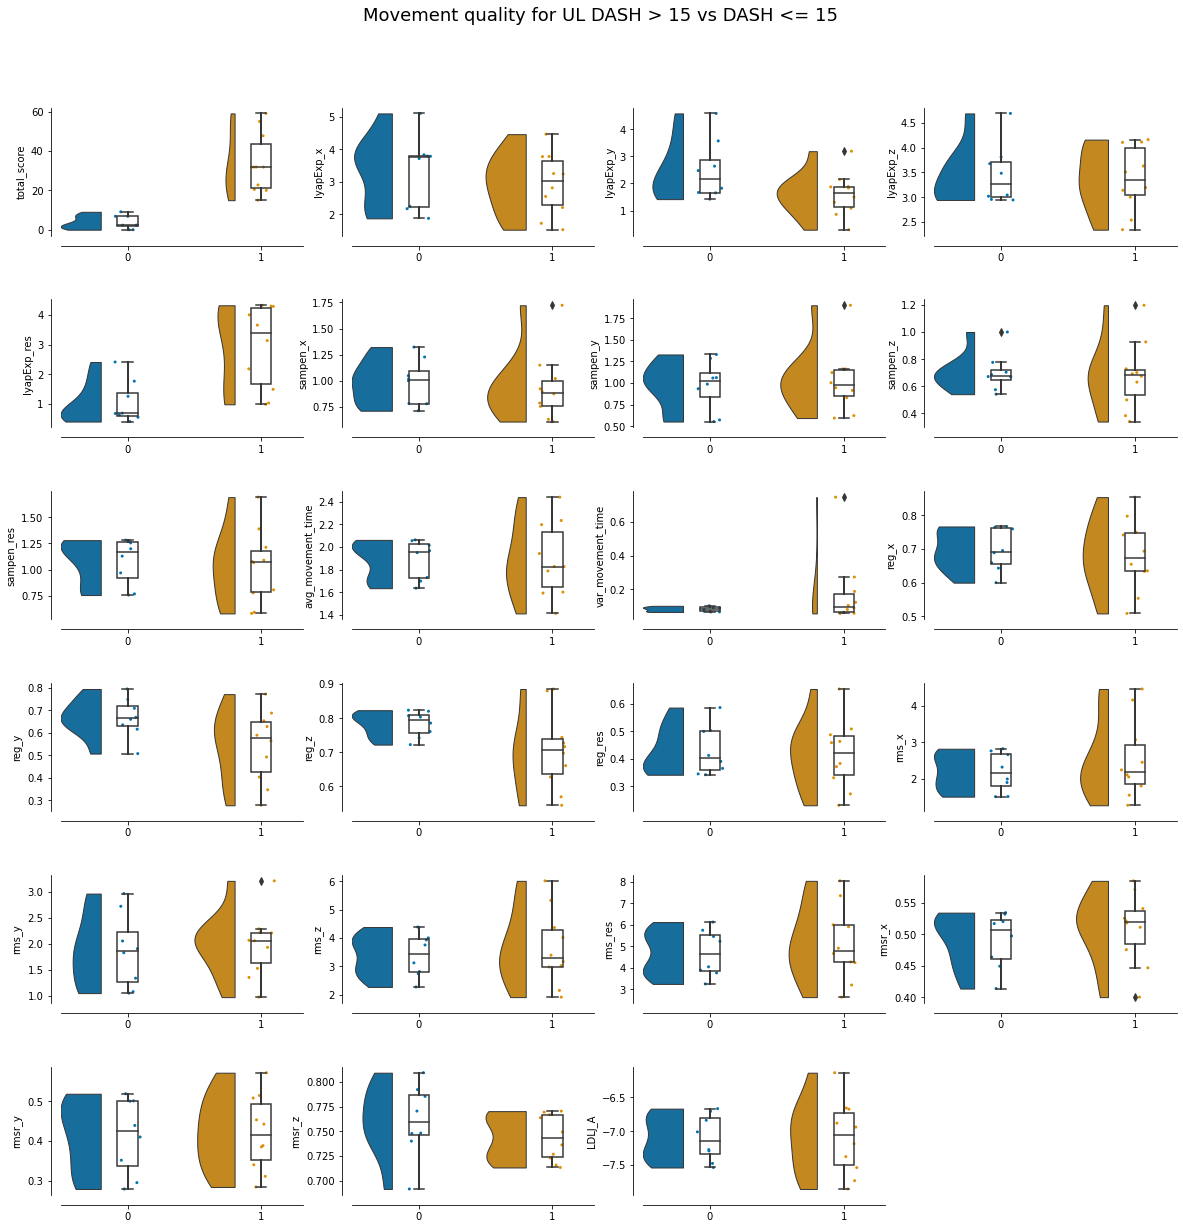

In [103]:
# plot the results
X = df2.drop(['ppID', 'group'], axis = 1)
# find minimium required rows given we want 5 columns
ncols = 4
nrows = len(X.columns) // ncols + (len(X.columns) % ncols > 0)
dx = "group"; ort = "v"; pal = 'colorblind'; sigma = .6; viol = .6; mv = .0

f = plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Movement quality for UL DASH > 15 vs DASH <= 15", fontsize=18, y=0.95)

f.tight_layout();
offset = 0.1;

for n, columns in enumerate(X.columns):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
    
    # filter df and plot ticker on the new subplot axis
    #df[df["ticker"] == ticker].plot(ax=ax)
     
    pt.RainCloud(x = dx, y = columns, data = df2, ax = ax,
                palette = pal, bw = sigma, width_viol = viol,
                orient = ort, move = mv)
    sns.despine(offset=10)
    ax.set_xlabel('')

In [104]:
for var in df2.columns:
    print('Analyzing {}'.format(var))
    if var == 'ppID' or var == 'group':
        print(80 * '_' + '\n')
    else:
        t_statistic, pvalue = stats.mannwhitneyu(pain[var], no_pain[var])
        print(t_statistic, round(pvalue, ndigits=4))
        
        print(80* "_" + "\n" )
        

Analyzing ppID
________________________________________________________________________________

Analyzing total_score
80.0 0.0004
________________________________________________________________________________

Analyzing lyapExp_x
29.0 0.3599
________________________________________________________________________________

Analyzing lyapExp_y
23.0 0.1457
________________________________________________________________________________

Analyzing lyapExp_z
41.0 0.9654
________________________________________________________________________________

Analyzing lyapExp_res
71.0 0.0044
________________________________________________________________________________

Analyzing sampen_x
32.0 0.5148
________________________________________________________________________________

Analyzing sampen_y
41.0 0.9654
________________________________________________________________________________

Analyzing sampen_z
37.0 0.8286
________________________________________________________________________

# set up data for logistic regression and subsequent AUC ROC analysis

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.linear_model import *
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ppID               18 non-null     object 
 1   total_score        18 non-null     float64
 2   lyapExp_x          18 non-null     float64
 3   lyapExp_y          18 non-null     float64
 4   lyapExp_z          18 non-null     float64
 5   lyapExp_res        18 non-null     float64
 6   sampen_x           18 non-null     float64
 7   sampen_y           18 non-null     float64
 8   sampen_z           18 non-null     float64
 9   sampen_res         18 non-null     float64
 10  avg_movement_time  18 non-null     float64
 11  var_movement_time  18 non-null     float64
 12  reg_x              18 non-null     float64
 13  reg_y              18 non-null     float64
 14  reg_z              18 non-null     float64
 15  reg_res            18 non-null     float64
 16  rms_x              18 non-nu

In [68]:
df2.describe()

,total_score,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,avg_movement_time,...,reg_res,rms_x,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A,group
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,20.277778,3.101741,1.990053,3.408157,2.097816,0.960485,1.001812,0.688663,1.052137,1.888431,...,0.422093,2.370695,1.932331,3.522093,4.933486,0.501084,0.416645,0.751042,-7.099253,0.555556
std,19.068703,1.009076,1.020101,0.610347,1.469156,0.273801,0.326255,0.204667,0.292876,0.259176,...,0.107224,0.861957,0.639801,1.071099,1.445148,0.050301,0.092009,0.030391,0.449572,0.511310
min,0.000000,1.526600,0.293220,2.346808,0.407246,0.611762,0.553176,0.339758,0.583859,1.414286,...,0.230909,1.279228,0.972991,1.919473,2.636758,0.400024,0.279188,0.691511,-7.854389,0.000000
25%,3.409091,2.218102,1.441520,3.006507,0.763471,0.782687,0.851182,0.588479,0.786253,1.707738,...,0.349822,1.830326,1.396128,2.858914,3.931289,0.466575,0.343197,0.729093,-7.451944,0.000000
50%,17.500000,3.245300,1.828349,3.338434,1.629194,0.910171,0.994786,0.679640,1.084673,1.885714,...,0.401030,2.178293,1.992912,3.281116,4.791006,0.517358,0.424884,0.748690,-7.098571,1.000000
75%,31.818182,3.780791,2.394306,3.773861,3.522752,1.043495,1.151584,0.722559,1.245170,2.045833,...,0.495843,2.737925,2.215472,4.013211,5.873688,0.530052,0.501282,0.770103,-6.740511,1.000000
max,59.090909,5.100689,4.588349,4.685844,4.320424,1.723219,1.900082,1.197220,1.691647,2.440476,...,0.653188,4.452761,3.212390,6.010001,8.051078,0.584669,0.572469,0.809262,-6.137404,1.000000


In [69]:
df2['group'].value_counts()

1    10
0     8
Name: group, dtype: int64

sns.pairplot(df2, hue='group')

In [70]:
df2['product'] = df2['LDLJ_A'] * df2['sampen_res']
df2['ratio'] = df2['sampen_res'] / df2['LDLJ_A']
df2.head()

,ppID,total_score,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,...,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A,group,product,ratio
0,BC_014,31.818182,2.811917,1.498060,3.002123,4.283553,0.788979,0.621933,0.382743,0.808492,...,1.526994,3.025244,4.241089,0.517852,0.385478,0.763699,-6.882059,1,-5.564090,-0.117478
1,BC_015,59.090909,3.252862,3.193279,2.539452,1.491935,1.023071,1.162082,0.692327,1.078596,...,1.931975,4.367375,6.004383,0.540645,0.340328,0.769337,-6.137404,1,-6.619782,-0.175741
2,BC_019,31.818182,3.775711,1.883521,4.158807,4.320424,0.611762,0.914540,0.339758,0.583859,...,0.972991,1.919473,2.636758,0.510976,0.388652,0.766716,-7.732105,1,-4.514457,-0.075511
3,BC_023,55.000000,3.773471,1.874017,3.506464,0.987748,0.924525,0.830062,0.630558,0.778840,...,2.057908,2.978889,4.276644,0.446522,0.508578,0.736184,-7.185895,1,-5.596664,-0.108385
4,BC_029,20.454545,3.237737,0.293220,2.346808,3.132351,1.723219,1.900082,1.197220,1.691647,...,2.217484,6.010001,8.051078,0.570752,0.284236,0.770358,-7.854389,1,-13.286852,-0.215376


<AxesSubplot:xlabel='ratio', ylabel='total_score'>

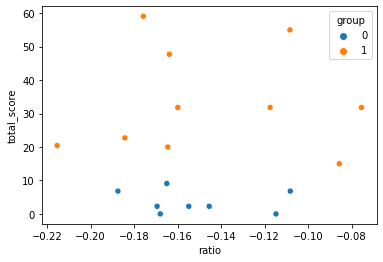

In [71]:
sns.scatterplot(x='ratio', y='total_score', data = df2, hue = 'group')

<AxesSubplot:>

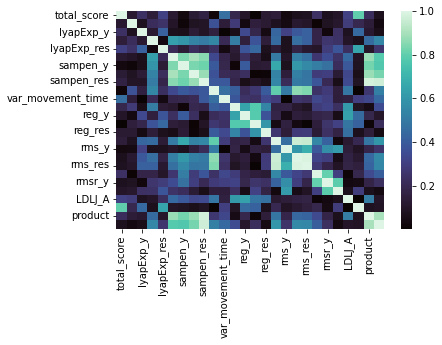

In [72]:
sns.heatmap(abs(df2.corr()), cmap="mako")

Accuracy: 40.0%


,0,1
0,1,0
1,3,1


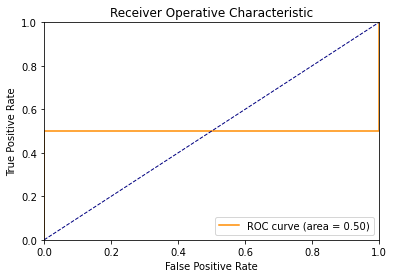

In [76]:
regularization_path = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

#set X and y
X = df2.drop(['ppID', 'total_score', 'group'],axis=1)
y = df2['group']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Standardize
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression
prev_accuracy = 0
prev_C = None

for C in regularization_path:
    pipeline = LogisticRegression(penalty = 'l1', solver = 'liblinear', C=C)
    model = pipeline.fit(X_train, y_train)
    n = (model.coef_ != 0).sum()
    accuracy = model.score(X_train, y_train)
    if accuracy < prev_accuracy: break
    prev_accuracy = accuracy
    prev_C = C
    
pipeline = LogisticRegression(penalty='l1', solver = 'liblinear', C=prev_C)
model = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('Accuracy: {}%'.format(accuracy_score(y_test, y_pred)*100))
        
# Confusion Matrix 
m = pd.DataFrame(confusion_matrix(y_test, y_pred))
display(m)

# ROC and AUC
y_score = pipeline.decision_function(X_test)
probs = model.predict_proba(X_test)
probs = probs[:,1]
fpr = dict()
tpr = dict()
roc_auc = dict()
# compute ROC curve and AUC for each class 
fpr[0], tpr[0], _ = roc_curve(y_test[:], probs[:])
roc_auc[0] = auc(fpr[0], tpr[0])

# plot the ROC curve
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color= 'navy', lw = 1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operative Characteristic')
plt.legend(loc='lower right')
plt.show()

In [77]:
coeficients = pd.DataFrame({'feature_name':X.columns,
                          'model.coef': model.coef_[0]})

In [78]:
coeficients

,feature_name,model.coef
0,lyapExp_x,0.000000
1,lyapExp_y,-0.207680
2,lyapExp_z,0.000000
3,lyapExp_res,0.230118
4,sampen_x,0.000000
5,sampen_y,0.000000
6,sampen_z,0.000000
7,sampen_res,0.000000
8,avg_movement_time,0.000000
9,var_movement_time,0.000000


In [101]:
df2[df2['var_movement_time'] == max(df2['var_movement_time'])]

,ppID,total_score,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,...,reg_res,rms_x,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A,group
2,BC_019,31.818182,3.775711,1.883521,4.158807,4.320424,0.611762,0.91454,0.339758,0.583859,...,0.27213,1.279228,0.972991,1.919473,2.636758,0.510976,0.388652,0.766716,-7.732105,1
